# Effect of initial conditions for the MR equations
In this notebook we analyse the first part of the trajectories of stokes drifters that are advected with
1. the full MR equations initialized with the fluid velocity at the starting location of the drifter
2. the full MR equations initialized with the velocity calculated using the slow manifold MR (MRSM) equation
3. the slow manifold MR equations (RMSM)

We ran all simulations for 3hours and printed the particles location every integration timestep of 1min.   
The particles were released around the celtic sea as we observe that the MR and MRSM trajectories show some difference there.

In [35]:
# import needed packages
import numpy as np
import xarray as xr 
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
import cartopy.crs as ccrs #for plotting on map
import cartopy as cart
from decimal import Decimal
import plotly.express as px # for 3d plotting
from datetime import datetime, timedelta
from analysis_functions import trajectory_length,  make_PDF, Haversine, running_mean
import sys
sys.path.append("/nethome/4291387/Maxey_Riley_advection/Maxey_Riley_advection/simulations")
from helper import create_filelist

plt.style.use('../python_style_Meike.mplstyle')

Rearth = 6371 * 10**3 # in k,
deg2rad = np.pi / 180.


base_directory = '/storage/shared/oceanparcels/output_data/data_Meike/MR_advection/NWES/test_init_conditions/'

basefile = (base_directory + '{particle_type}_{loc}_start{y_s:04d}_{m_s:02d}_{d_s:02d}'
           '_end{y_e:04d}_{m_e:02d}_{d_e:02d}_RK4_B{B:04d}_tau{tau:04d}.zarr')


colorlist=np.array(['c','purple','orange','navy','red','black','green'])

loc = 'custom'
particle_types = ['inertial','inertial_initSM','inertial_SM']

rename_coordinates= [{'lon':'lon_MR', 'lat':'lat_MR', 'time':'time_MR'},
{'lon':'lon_MR_initMRSM', 'lat':'lat_MR_initMRSM', 'time':'time_MR_initMRSM'},
{'lon':'lon_MRSM', 'lat':'lat_MRSM', 'time':'time_MRSM'}]

In [36]:
starttime=datetime(2023, 9, 1, 0, 0, 0, 0)
runtime=timedelta(hours=3)
B = 0.68
tau = 2759.97
endtime = starttime + runtime 
ds_array = [ ]
for particle_type, coords in zip(particle_types,rename_coordinates):
    file=   basefile.format(particle_type = particle_type,
                                        loc=loc,
                                            y_s=starttime.year,
                                            m_s=starttime.month,
                                            d_s=starttime.day,
                                            y_e=endtime.year,
                                            m_e=endtime.month,
                                            d_e=endtime.day,
                                            B = int(B * 1000), 
                                            tau = int(tau ))
    ds =  xr.open_dataset(file,
                           engine='zarr',
                           #chunks={'trajectory':nparticles, 'obs':chunck_time},
                           drop_variables=['B','tau','z'],
                           decode_times=False)  #,decode_cf=False)
    ds = ds.rename(coords)
    ds_array.append(ds)

data = xr.merge(ds_array)
    

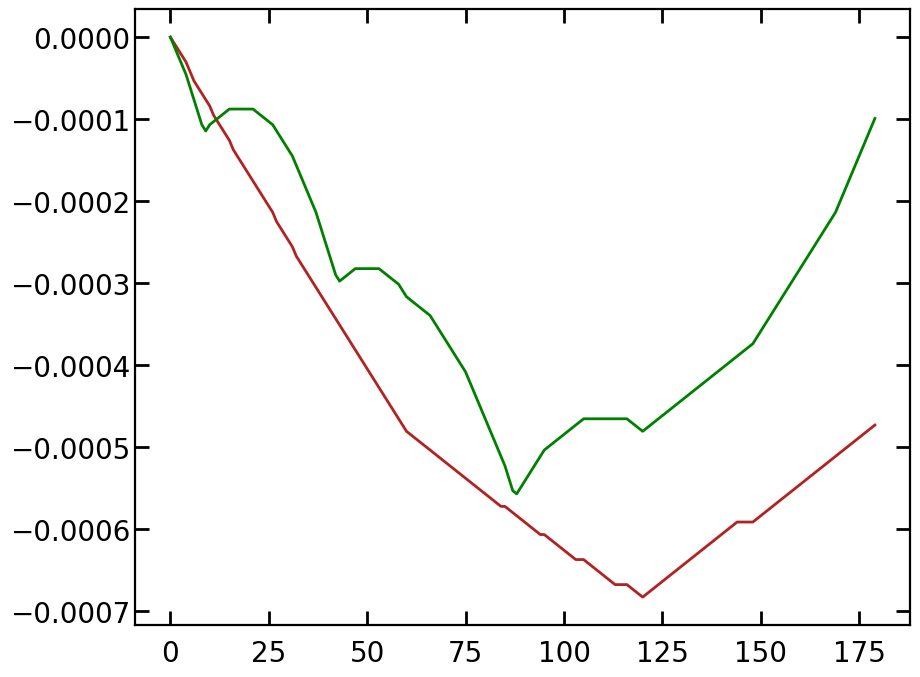

In [37]:
fig, ax = plt.subplots()
i=100
# ax.plot(data.lat_MRSM[0], color='navy')

ax.plot(data.lat_MR[i]-data.lat_MRSM[i],color='firebrick')
ax.plot(data.lat_MR_initMRSM[i]-data.lat_MRSM[i],color='green')

/tmp/ipykernel_219274/1310089058.py:2: RuntimeWarning: Mean of empty slice
  ax.plot(np.nanmean(data.lat_MR-data.lat_MRSM,axis=0),color='firebrick')
/tmp/ipykernel_219274/1310089058.py:3: RuntimeWarning: Mean of empty slice
  ax.plot(np.nanmean(data.lat_MR_initMRSM-data.lat_MRSM,axis=0),color='green')


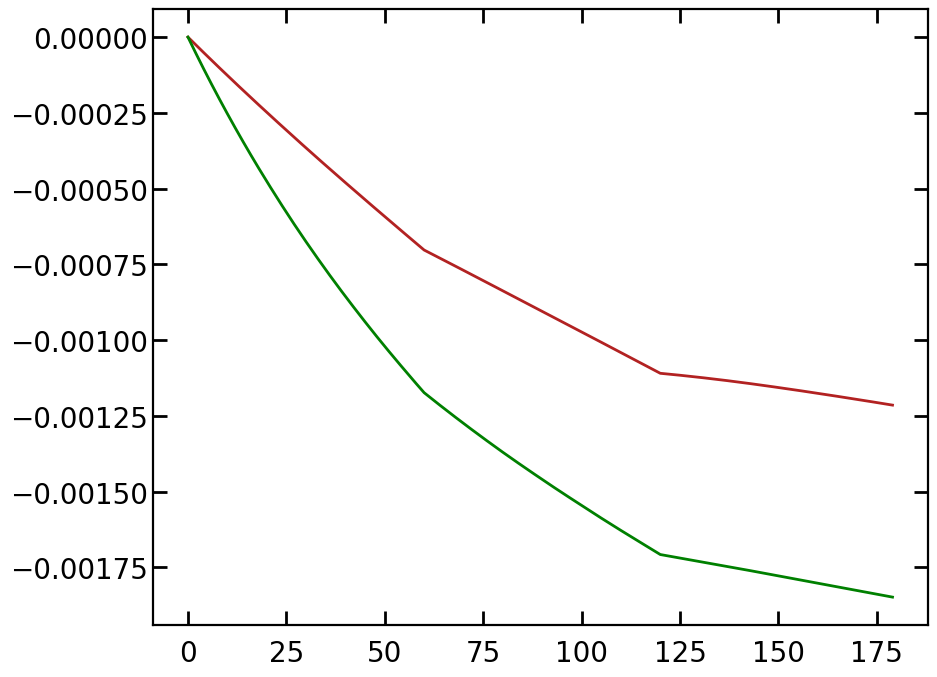

In [38]:
fig, ax = plt.subplots()
ax.plot(np.nanmean(data.lat_MR-data.lat_MRSM,axis=0),color='firebrick')
ax.plot(np.nanmean(data.lat_MR_initMRSM-data.lat_MRSM,axis=0),color='green')

In [39]:
tr_length_MR = trajectory_length(data.lon_MR, data.lat_MR)
tr_length_MR_initMRSM = trajectory_length(data.lon_MR_initMRSM, data.lat_MR_initMRSM)
tr_length_MRSM = trajectory_length(data.lon_MRSM, data.lat_MRSM)

/tmp/ipykernel_219274/3516833963.py:4: RuntimeWarning: Mean of empty slice
  ax.plot(np.nanmean((tr_length_MR-tr_length_MRSM),axis=0), color='firebrick')
/tmp/ipykernel_219274/3516833963.py:5: RuntimeWarning: Mean of empty slice
  ax.plot(np.nanmean((tr_length_MR_initMRSM-tr_length_MRSM),axis=0),color='green')


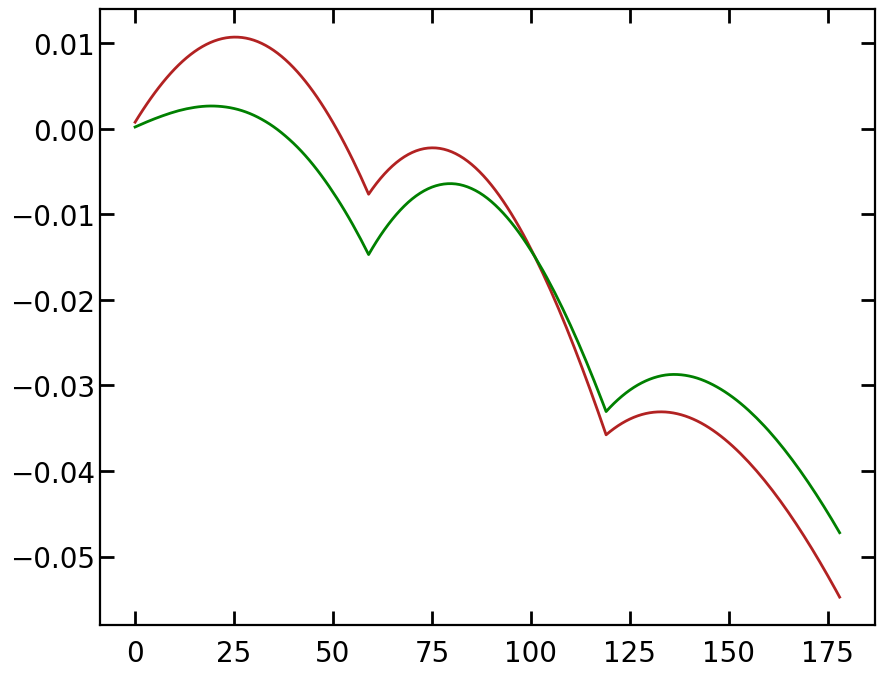

In [40]:
fig, ax = plt.subplots()
i = 3
# ax.plot(tr_length_MRSM[0], color='navy')
ax.plot(np.nanmean((tr_length_MR-tr_length_MRSM),axis=0), color='firebrick')
ax.plot(np.nanmean((tr_length_MR_initMRSM-tr_length_MRSM),axis=0),color='green')
#conclusion, initial difference is better using the MRSM velocity, however the difference between 
# the MR and MRSM is still there during hte simulaiton so ane should use the full MR eq? 

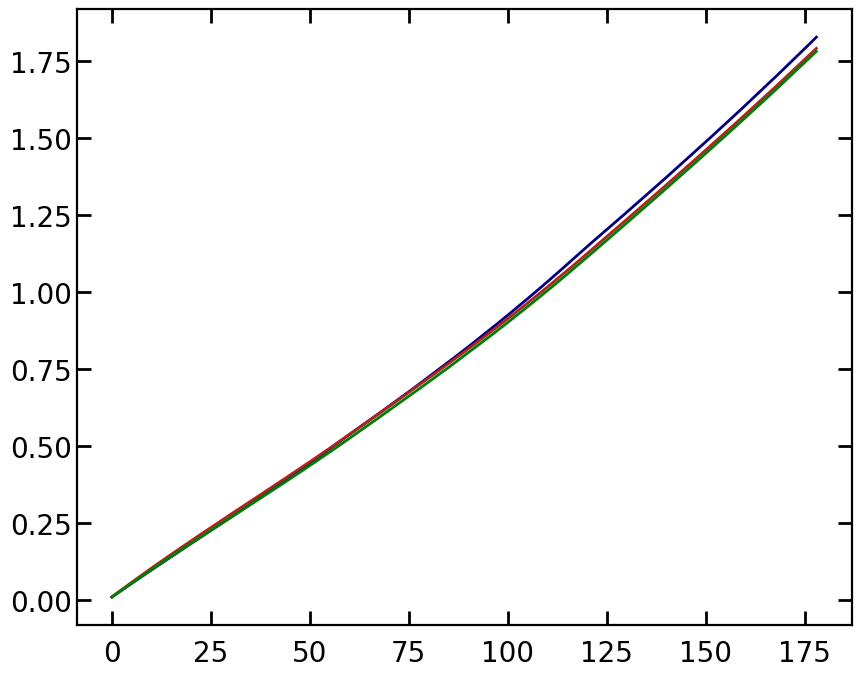

In [ ]:
fig, ax = plt.subplots()
ax.plot(tr_length_MRSM[0], color='navy')
ax.plot(tr_length_MR[0], color='firebrick')
ax.plot(tr_length_MR_initMRSM[0],color='green')